In [7]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras 
from keras.models import Sequential 
from keras.applications import InceptionV3
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt 
import seaborn as sns
import glob 
import cv2

Number of images : 25000


c:\Users\abi\Desktop\abijith\DeepLearning\DL\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abi\Desktop\abijith\DeepLearning\DL\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abi\Desktop\abijith\DeepLearning\DL\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\abi\Desktop\abijith\DeepLearning\DL\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Us

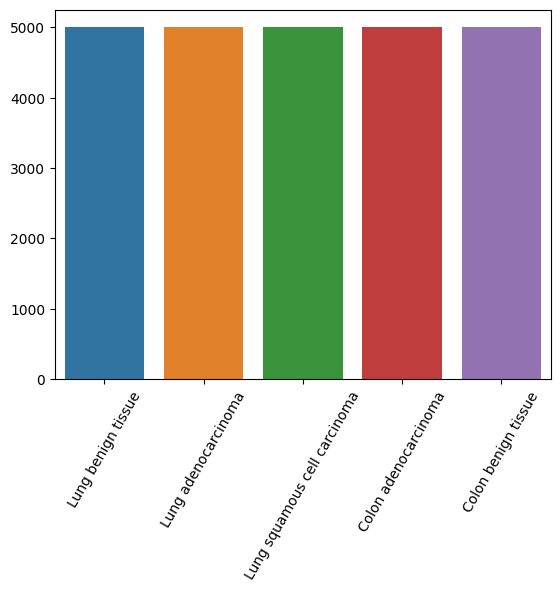

In [16]:
# Loading the data
import pathlib

dataset = pathlib.Path("lung_colon_image_set/")
images = list(dataset.glob('*/*/*.jpeg'))

print(f"Number of images : {len(images)}")

lbt = dataset.glob('lung_image_sets/lung_n/*')
laca = dataset.glob('lung_image_sets/lung_aca/*')
lscc = dataset.glob('lung_image_sets/lung_scc/*')
cacc = dataset.glob('colon_image_sets/colon_aca/*')
cbt = dataset.glob('colon_image_sets/colon_n/*')

lung_benign_tissue = list(lbt)
lung_adenocarcinoma = list(laca)
lung_squamous_cell_carcinoma = list(lscc)
colon_adenocarcinoma = list(cacc)
colon_benign_tissue = list(cbt)

x = ['Lung benign tissue','Lung adenocarcinoma','Lung squamous cell carcinoma','Colon adenocarcinoma','Colon benign tissue']
y = [len(lung_benign_tissue),len(lung_adenocarcinoma),len(lung_squamous_cell_carcinoma),len(colon_adenocarcinoma),len(colon_benign_tissue)]
sns.barplot(x=x,y=y)
plt.xticks(rotation=60)
plt.show()

In [17]:
label_dict = {
    'lung_benign_tissue' : 0,
    'lung_adenocarcinoma' : 1,
    'lung_squamous_cell_carcinoma' : 2,
    'colon_adenocarcinoma' : 3,
    'colon_benign_tissue' : 4
}

image_dict = {
    'lung_benign_tissue' : lung_benign_tissue,
    'lung_adenocarcinoma' : lung_adenocarcinoma,
    'lung_squamous_cell_carcinoma' : lung_squamous_cell_carcinoma,
    'colon_adenocarcinoma' : colon_adenocarcinoma,
    'colon_benign_tissue' :colon_benign_tissue
}

In [18]:
image_dict
x,y = [],[]

for name,images in image_dict.items():
    for img in images:
        i = cv2.imread(str(img))
        resized_image = cv2.resize(i,(229,229))
        x.append(resized_image)
        y.append(label_dict[name])

x = np.array(x)
y = np.array(y)